# Brooks Eval
Goal: measure correlation of predicted and actual RNA-seq coverage for novel junctions. This notebook is to produce a file which contains columns: sequence, coverage values, strain, chrom, strand, clusterStart, clusterEnd

Implementation: 
1. Identify novel junctions blocks
2.
N. A Pytorch data loader based on a custom dataset which provides tuple of (sequence, track, true_coverage). True coverage will have dim 3000 (untransformed)

In [22]:
import pandas as pd
tdf = pd.read_pickle("/home/tds122/clex/data/samples_290625/brooks.pkl")

df_cov = pd.read_pickle("/home/tds122/clex/runs/2025-05-11_16-26-05_ablation_100_rep3/Brooks/brooks_eval_df_with_preds.pkl")

vdf = tdf[tdf['fold'] == "val"]

vdf

,chr_loss,strand_loss,start_sample,end_sample,start_loss,end_loss,loss_sequence,sample_sequence,fold,track_values,hom_graph_id
107,JS610_1,+,1894,3106,-894,2106,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN
108,JS610_1,+,4383,9383,5383,8383,ACAATATGAAGAACTTATAGAGCTATCTAGTAAATTTGATATTGAG...,AGAAAGGCTATTTGATTTGTGTAGATATTTGTTCCAACTTTCCGGT...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN
109,JS610_1,+,31732,36732,32732,35732,ATAAACGGCTCACTGAGCTCGAGTCTTCAGAACGTGAAACTTATTG...,CAAGGAAAAAAGGGTCCAATGCCAAGAAATAATAAAACGGACCCTT...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN
110,JS610_1,+,71775,76775,72775,75775,CACTTTTCTTGCCAAGTACGAAATAGGGAAGGGCATACCAGAATCC...,CTTCTTCTTTTTCTGCATTATCGTTTTTAGCCACTTTACGAAAAAG...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN
111,JS610_1,+,85029,90029,86029,89029,CTCTCGTCATGATAAAAAACATTACTACCGGAAACAAGAAACGTGA...,CGTGCGCTATTGAAACAAATCTCACATAAATGTGTTTATGATCAGC...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320,JS710_1,+,312908,317908,313908,316908,GGAGGATCACAACAACAACAGCATCAGCAGCAGCAACAACAGCAAC...,AGTTTTGAGGCAACATAACAATCACGCGGACAAGCAATTCCTCCTG...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN
321,JS710_1,+,313800,318800,314800,317800,ATTTTCATCCTGCACTTTTGGGGTTCCCTAAACCCGATGTAACTGC...,AACAACAGCAATAATAACAGTAACCATGATATACTGAATTTTAATG...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN
344,JS715_1,+,1935,3065,-935,2065,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN
345,JS715_1,+,13689,18689,14689,17689,CAATACTAACGAAAAAGATGACAAAAATAAGGCGAGGACAACTTCT...,CGAACGCCGTAGGTAATAGAAAAGCTATCTCTGAAGAAAGCTTGAG...,val,/home/tds122/clex/clex/eval/brooks/track_value...,NaN


In [23]:
merged = pd.merge(left=vdf, right=df_cov, left_on=['chr_loss', "start_sample", "end_sample"], right_on=["chrom", "seq_start", "seq_end"], how="inner")

merged

,chr_loss,strand_loss,start_sample,end_sample,start_loss,end_loss,loss_sequence,sample_sequence,fold,track_values,...,seq_start,seq_end,sequence,sequence_rc,+_cov,-_cov,+_file,-_file,+_pred,-_pred
0,JS610_1,+,4383,9383,5383,8383,ACAATATGAAGAACTTATAGAGCTATCTAGTAAATTTGATATTGAG...,AGAAAGGCTATTTGATTTGTGTAGATATTTGTTCCAACTTTCCGGT...,val,/home/tds122/clex/clex/eval/brooks/track_value...,...,4383,9383,AGAAAGGCTATTTGATTTGTGTAGATATTTGTTCCAACTTTCCGGT...,GTCACGAGACATTGATCACGATTAATGATGAAAACGAAATAATTAA...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[33.82350158691406, 46.12300109863281, 49.1977...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,"[4.922794, 4.922794, 4.922794, 4.922794, 4.922...","[0.055763293, 0.055763293, 0.055763293, 0.0557..."
1,JS610_1,+,31732,36732,32732,35732,ATAAACGGCTCACTGAGCTCGAGTCTTCAGAACGTGAAACTTATTG...,CAAGGAAAAAAGGGTCCAATGCCAAGAAATAATAAAACGGACCCTT...,val,/home/tds122/clex/clex/eval/brooks/track_value...,...,31732,36732,CAAGGAAAAAAGGGTCCAATGCCAAGAAATAATAAAACGGACCCTT...,GCGCTTATACTTAGTTTGAAACACAGAGGGAGGATACTGACCTAAA...,"[9.224590301513672, 9.224590301513672, 9.22459...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,"[6.73592, 6.73592, 6.73592, 6.73592, 6.73592, ...","[0.50277394, 0.50277394, 0.50277394, 0.5027739..."
2,JS610_1,+,71775,76775,72775,75775,CACTTTTCTTGCCAAGTACGAAATAGGGAAGGGCATACCAGAATCC...,CTTCTTCTTTTTCTGCATTATCGTTTTTAGCCACTTTACGAAAAAG...,val,/home/tds122/clex/clex/eval/brooks/track_value...,...,71775,76775,CTTCTTCTTTTTCTGCATTATCGTTTTTAGCCACTTTACGAAAAAG...,TATAGGTTCAATGATTCAGACGCCGCGTCACTGTAACGGCCTTCAT...,"[1.0249500274658203, 1.0249500274658203, 1.024...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,"[0.50638485, 0.50638485, 0.50638485, 0.5063848...","[47.23809, 47.23809, 47.23809, 47.23809, 47.23..."
3,JS610_1,+,85029,90029,86029,89029,CTCTCGTCATGATAAAAAACATTACTACCGGAAACAAGAAACGTGA...,CGTGCGCTATTGAAACAAATCTCACATAAATGTGTTTATGATCAGC...,val,/home/tds122/clex/clex/eval/brooks/track_value...,...,85029,90029,CGTGCGCTATTGAAACAAATCTCACATAAATGTGTTTATGATCAGC...,CTGGTAACGCTCTATGATCCAGTCGATTTTCAGAGAAACGATGCCT...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.623899459838867, 25.623899459838867, 25.62...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,"[0.07135509, 0.07135509, 0.07135509, 0.0713550...","[53.16807, 53.16807, 53.16807, 53.16807, 53.16..."
4,JS610_1,+,87464,92464,88464,91464,TGCCCTCGCCGCTGGGCTGGCGGCCGTCTATGGCCCTGCAAACGCG...,TGGTACTCAGATCATGCATGACCTCTGGGTAATTACCACTTCTCCC...,val,/home/tds122/clex/clex/eval/brooks/track_value...,...,87464,92464,TGGTACTCAGATCATGCATGACCTCTGGGTAATTACCACTTCTCCC...,AAATATTTCCAGCAAATTCATTCTGCAATCGGCTTGCATAACGCTG...,"[4.099820137023926, 4.099820137023926, 4.09982...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS6...,"[0.048602343, 0.048602343, 0.048602343, 0.0486...","[1.3587894, 1.3587894, 1.3587894, 1.3587894, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,JS710_1,+,207366,212366,208366,211366,AGACGTTTGGGATCCACATAATCAGTTTCTGCCTTTGTTGATTCGA...,ACGACCTTTGCAGCTGTTCAAATCTTTAGATATGGGTAGCCCTTCA...,val,/home/tds122/clex/clex/eval/brooks/track_value...,...,207366,212366,ACGACCTTTGCAGCTGTTCAAATCTTTAGATATGGGTAGCCCTTCA...,TTCGGTATCCACTTCTACATCTAAATCGGGTTCTTCACAACCACCA...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.8260700702667236, 3.8260700702667236, 3.826...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...,"[0.008565168, 0.008565168, 0.008565168, 0.0085...","[19.41886, 19.41886, 19.41886, 19.41886, 19.41..."
114,JS710_1,+,209320,214320,2

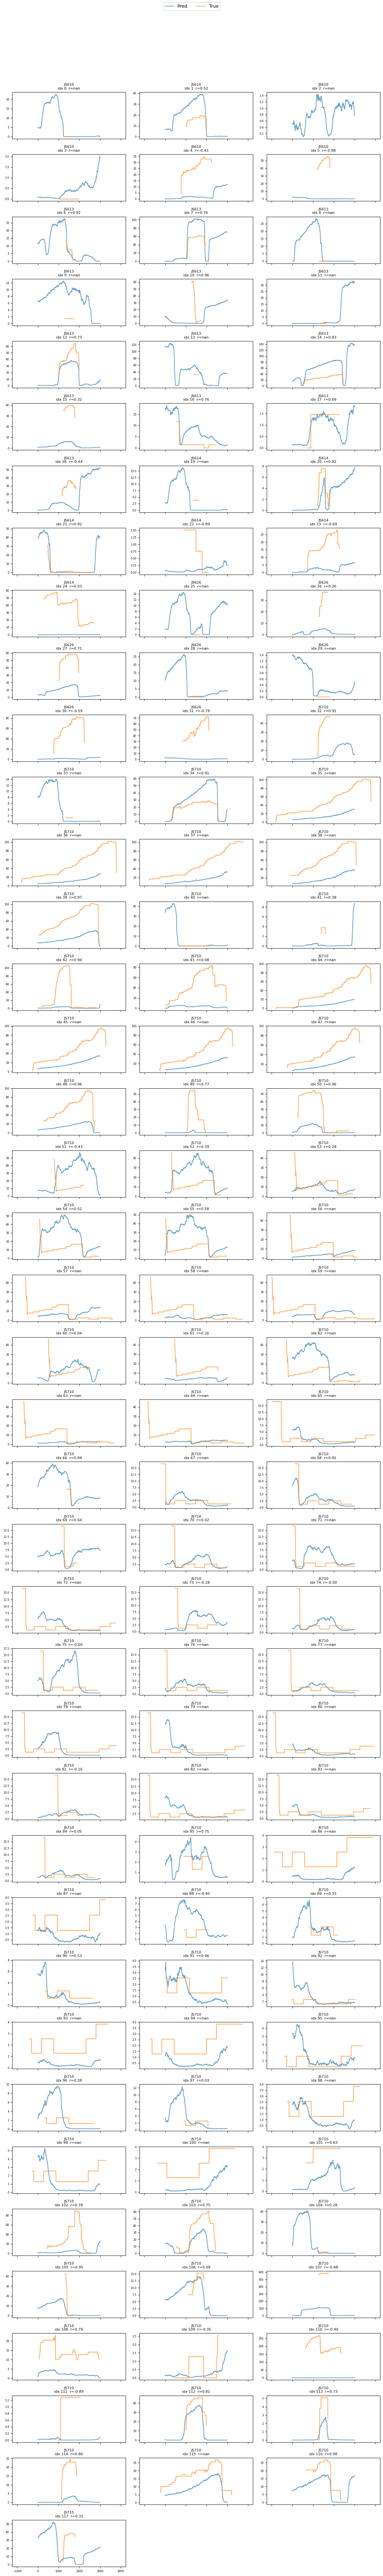

In [24]:
from clex.eval.brooks.utils import _plot_all_predictions
import pandas as pd

_plot_all_predictions(merged, strand="+", ncols=3, figsize_per_plot=(4, 2))

Saved correlations for 118 samples -> brooks_sample_correlations.csv


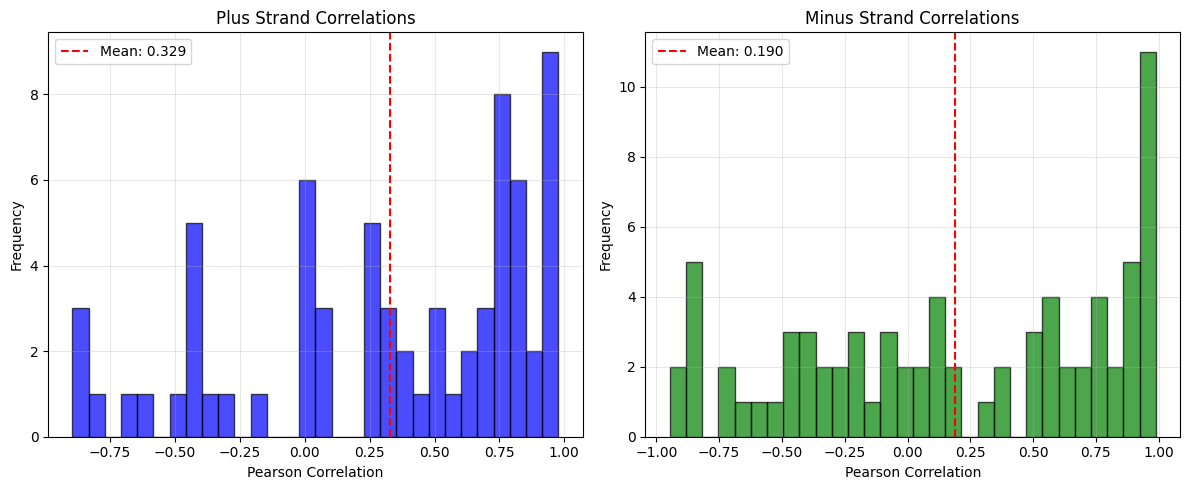

Plus strand correlation statistics:
Mean: 0.329
Std: 0.553
Min: -0.895
Max: 0.977

Minus strand correlation statistics:
Mean: 0.190
Std: 0.622
Min: -0.946
Max: 0.988


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from clex.eval.brooks.utils import save_correlations_csv

correlations = save_correlations_csv(merged, out_csv="brooks_sample_correlations.csv")

# Create two subplots for plus and minus strand correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for plus strand correlations
ax1.hist(correlations['plus_corr'].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Pearson Correlation')
ax1.set_ylabel('Frequency')
ax1.set_title('Plus Strand Correlations')
ax1.grid(True, alpha=0.3)
ax1.axvline(correlations['plus_corr'].mean(), color='red', linestyle='--', label=f'Mean: {correlations["plus_corr"].mean():.3f}')
ax1.legend()

# Plot histogram for minus strand correlations
ax2.hist(correlations['minus_corr'].dropna(), bins=30, alpha=0.7, color='green', edgecolor='black')
ax2.set_xlabel('Pearson Correlation')
ax2.set_ylabel('Frequency')
ax2.set_title('Minus Strand Correlations')
ax2.grid(True, alpha=0.3)
ax2.axvline(correlations['minus_corr'].mean(), color='red', linestyle='--', label=f'Mean: {correlations["minus_corr"].mean():.3f}')
ax2.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("Plus strand correlation statistics:")
print(f"Mean: {correlations['plus_corr'].mean():.3f}")
print(f"Std: {correlations['plus_corr'].std():.3f}")
print(f"Min: {correlations['plus_corr'].min():.3f}")
print(f"Max: {correlations['plus_corr'].max():.3f}")

print("\nMinus strand correlation statistics:")
print(f"Mean: {correlations['minus_corr'].mean():.3f}")
print(f"Std: {correlations['minus_corr'].std():.3f}")
print(f"Min: {correlations['minus_corr'].min():.3f}")
print(f"Max: {correlations['minus_corr'].max():.3f}")

In [26]:
correlations.shape

(118, 4)

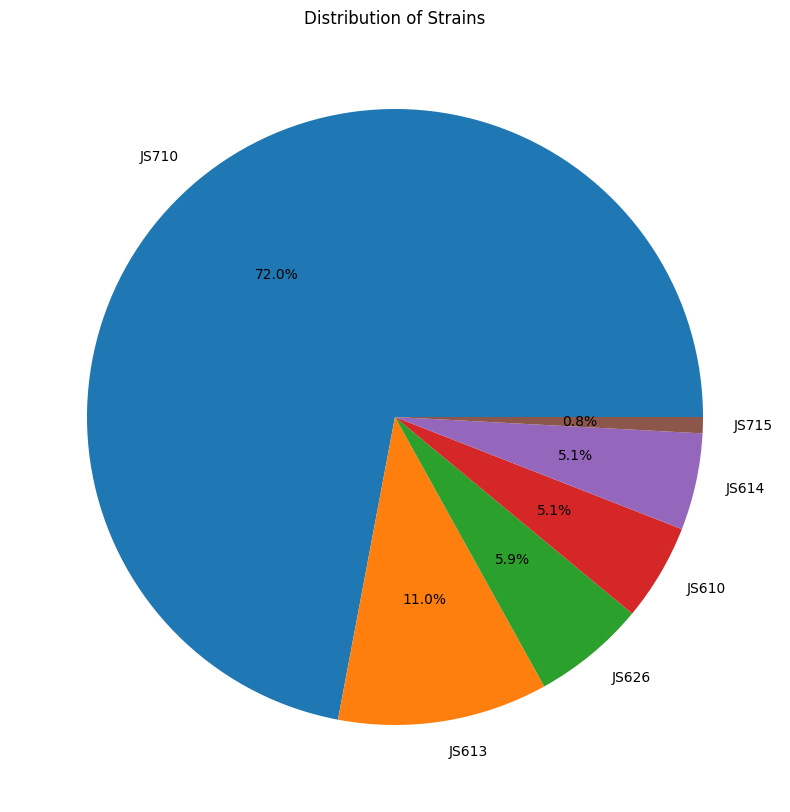

In [27]:
# Create pie chart of strain counts
strain_counts = correlations['strain'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(strain_counts.values, labels=strain_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Strains')
plt.show()

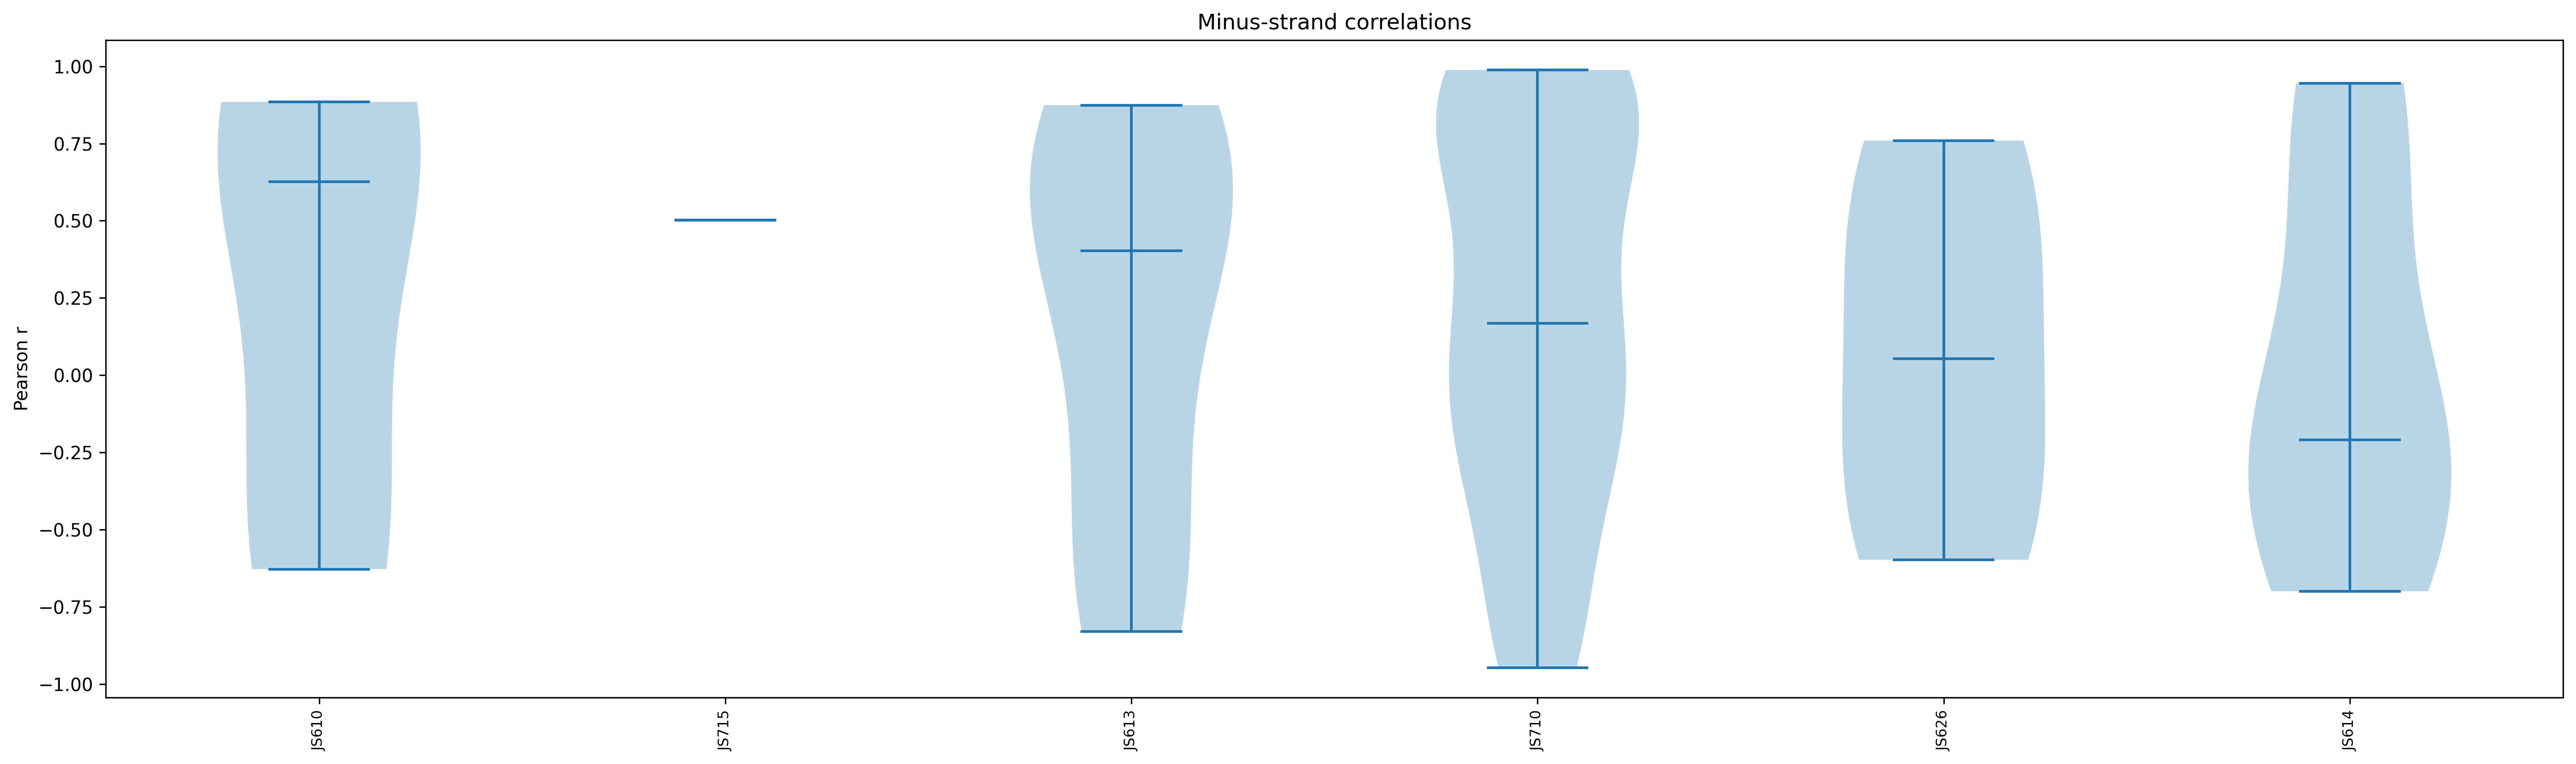

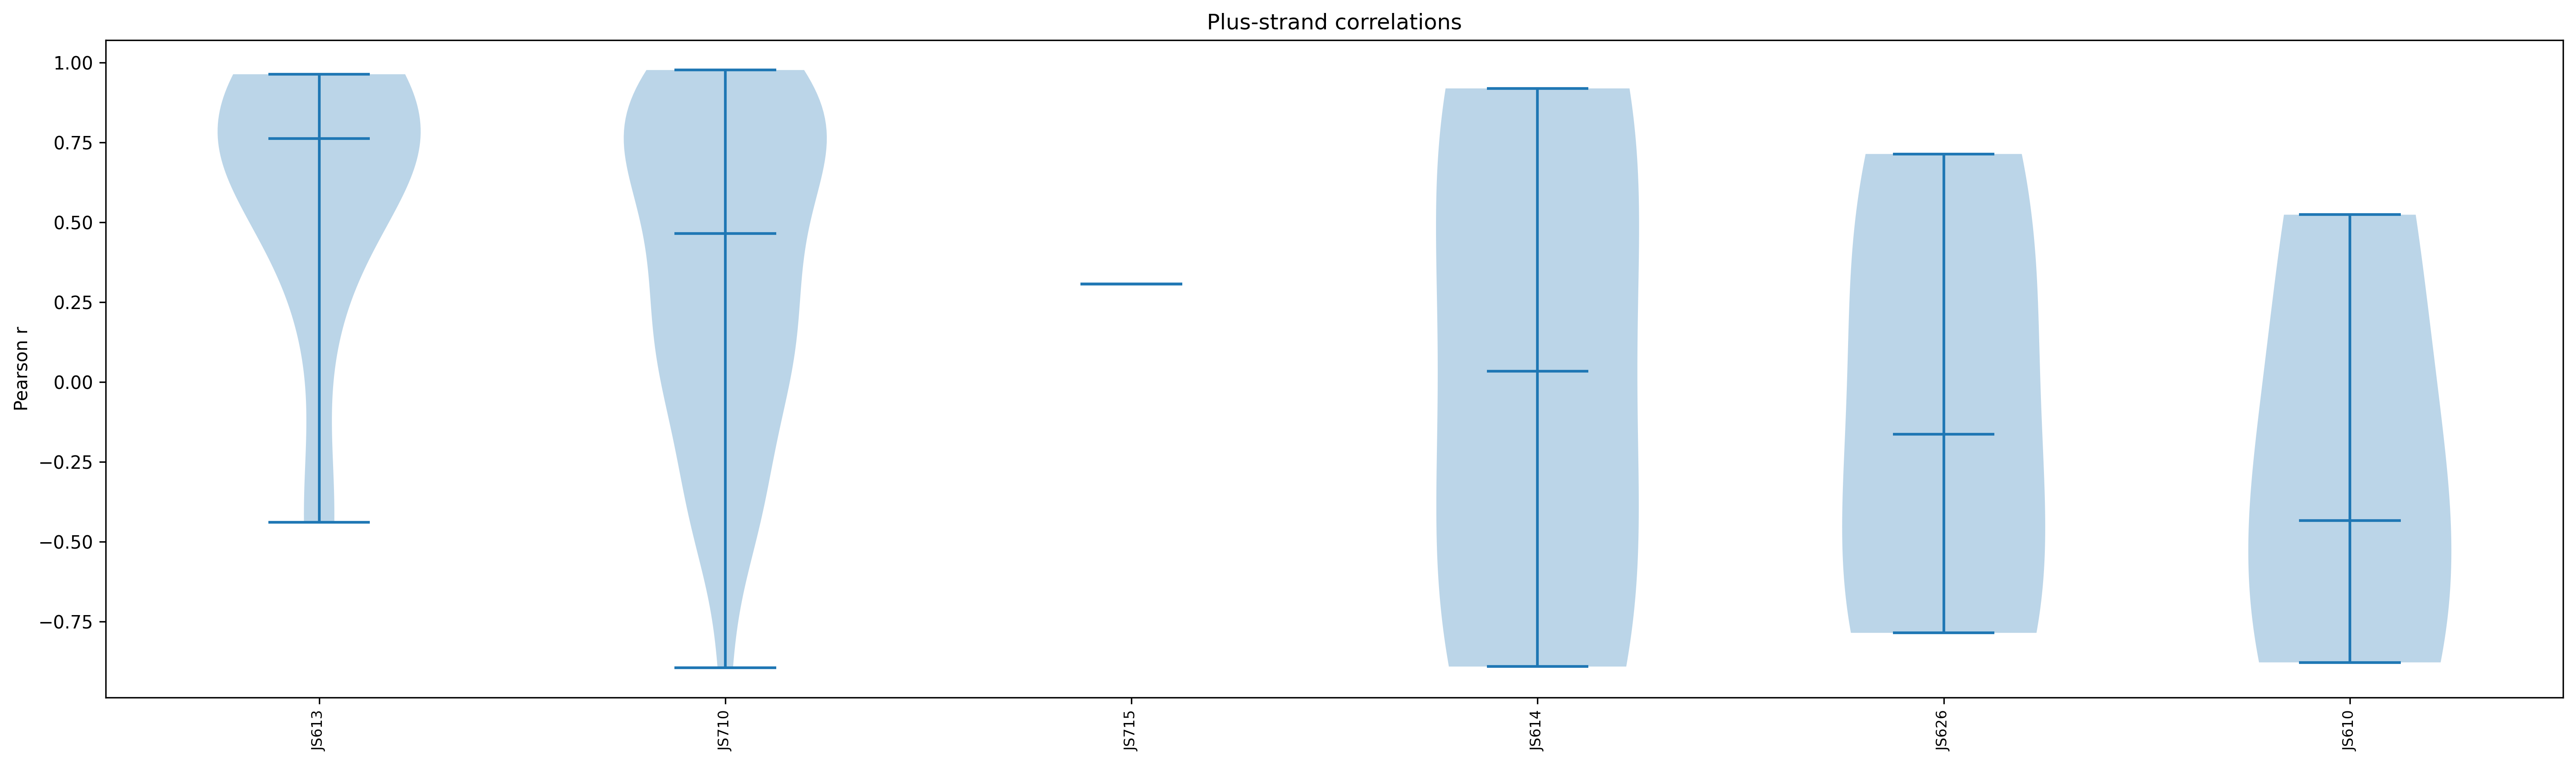

In [28]:
df = correlations
figsize=(20, 6)
dpi=300

# Get strains and calculate medians for sorting
strains = df["strain"].dropna().unique()
plus_medians = {s: df.loc[df["strain"] == s, "plus_corr"].median() for s in strains}
minus_medians = {s: df.loc[df["strain"] == s, "minus_corr"].median() for s in strains}

# Sort strains by median correlation
plus_strains = sorted(strains, key=lambda s: plus_medians[s], reverse=True)
minus_strains = sorted(strains, key=lambda s: minus_medians[s], reverse=True)

# Get data in sorted order
plus_data = [df.loc[df["strain"] == s, "plus_corr"].dropna().values
             for s in plus_strains]
minus_data = [df.loc[df["strain"] == s, "minus_corr"].dropna().values
              for s in minus_strains]

# ------------------------------------------------------------------ #
#  Plot minus strand
# ------------------------------------------------------------------ #
fig1, ax0 = plt.subplots(figsize=figsize, dpi=dpi)
ax0.violinplot(minus_data, showmeans=False, showmedians=True)
ax0.set_title("Minus-strand correlations")
ax0.set_xticks(range(1, len(minus_strains) + 1))
ax0.set_xticklabels(minus_strains, rotation=90, fontsize=8)
ax0.set_ylabel("Pearson r")
fig1.tight_layout()
plt.show()

# ------------------------------------------------------------------ #
#  Plot plus strand
# ------------------------------------------------------------------ #
fig2, ax1 = plt.subplots(figsize=figsize, dpi=dpi)
ax1.violinplot(plus_data, showmeans=False, showmedians=True)
ax1.set_title("Plus-strand correlations")
ax1.set_xticks(range(1, len(plus_strains) + 1))
ax1.set_xticklabels(plus_strains, rotation=90, fontsize=8)
ax1.set_ylabel("Pearson r")
fig2.tight_layout()
plt.show()

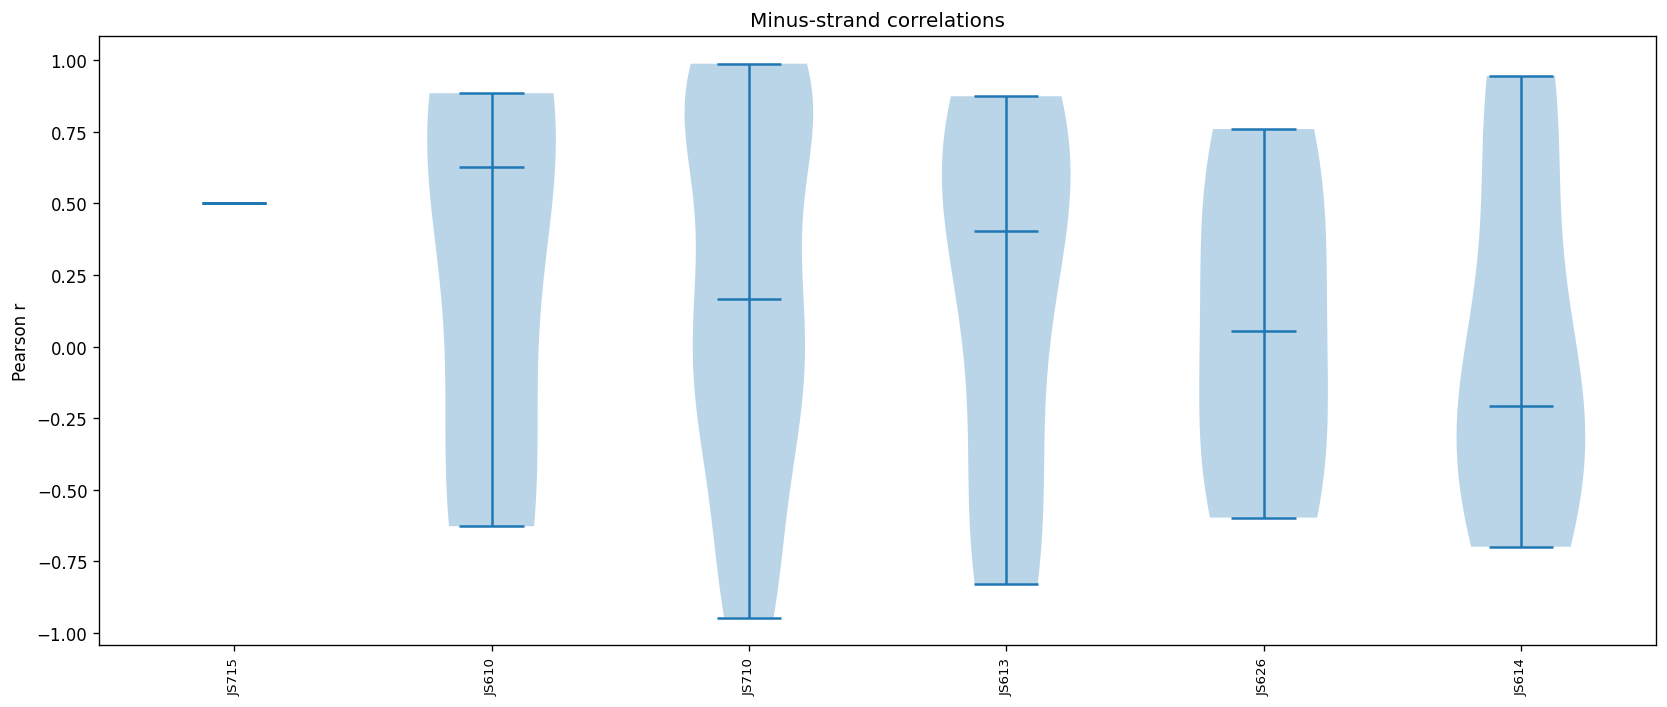

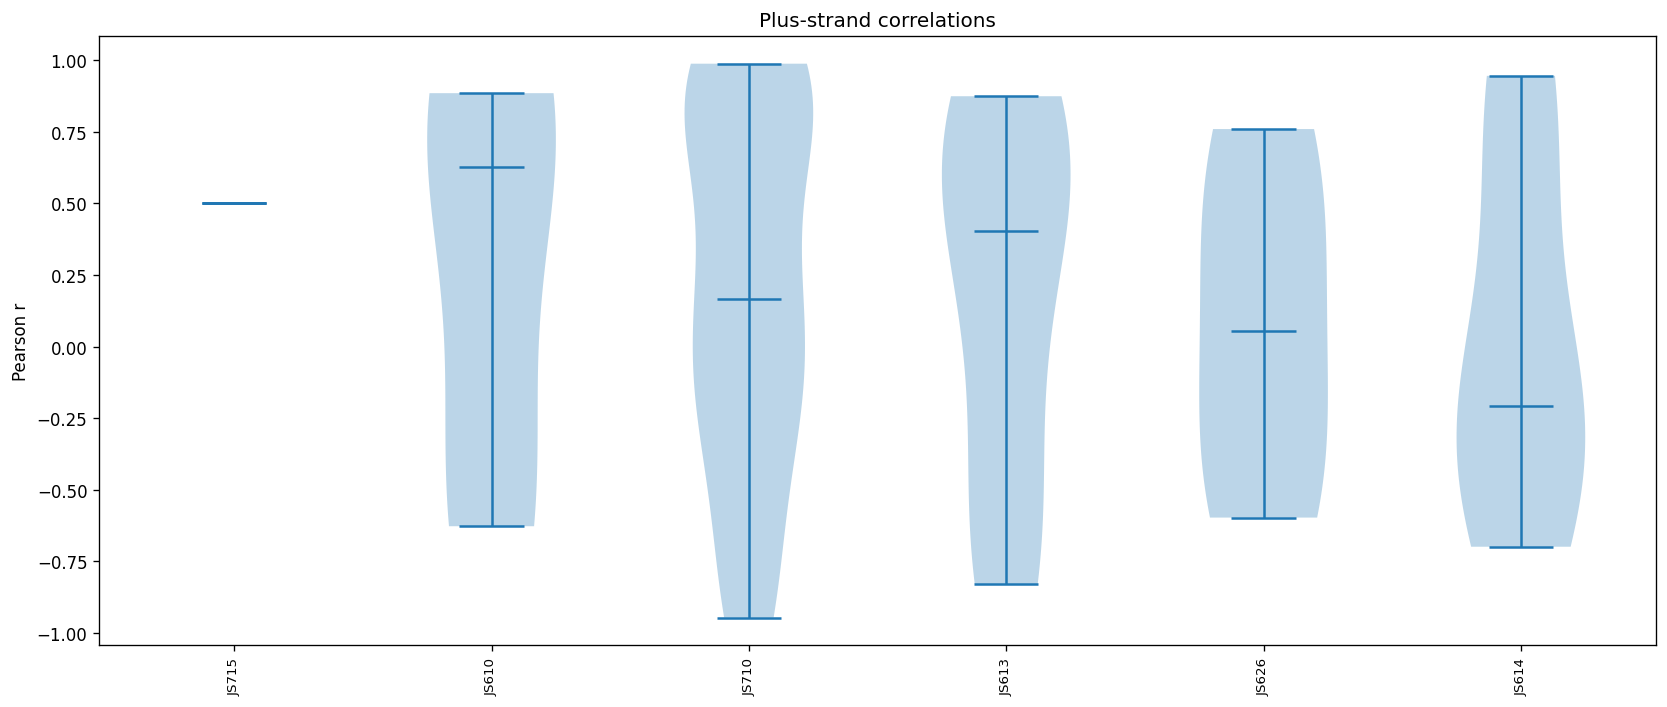

(<Figure size 1680x720 with 1 Axes>, <Figure size 1680x720 with 1 Axes>)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_strain_violin_correlation(df: pd.DataFrame,
                                   figsize=(14, 6),
                                   dpi=120):
    """
    Parameters
    ----------
    df : DataFrame with at least the columns
         'strain', 'plus_corr', 'minus_corr'.
    """

    # ----------------  helper to build cleaned data ---------------- #
    def _prepare(dataset_col: str):
        data, labels = [], []
        # Calculate medians for sorting
        medians = {}
        for strain in df["strain"].dropna().unique():
            vals = df.loc[df["strain"] == strain, dataset_col].dropna().values
            if vals.size:
                medians[strain] = vals.mean()  # Use mean for sorting
                
        # Sort strains by median
        sorted_strains = sorted(medians.keys(), key=lambda s: medians[s], reverse=True)
        
        # Build data in sorted order
        for strain in sorted_strains:
            vals = df.loc[df["strain"] == strain, dataset_col].dropna().values
            data.append(vals)
            labels.append(strain)
            
        return data, labels

    minus_data, minus_labels = _prepare("minus_corr")
    plus_data, plus_labels = _prepare("minus_corr")  # Sort plus data by minus medians too

    # ------------------------  plot minus strand  ------------------------------- #
    fig1 = plt.figure(figsize=figsize, dpi=dpi)
    ax0 = fig1.add_subplot(111)
    parts0 = ax0.violinplot(minus_data, showmedians=True)
    ax0.set_title("Minus-strand correlations")
    ax0.set_xticks(range(1, len(minus_labels) + 1))
    ax0.set_xticklabels(minus_labels, rotation=90, fontsize=8)
    ax0.set_ylabel("Pearson r")
    fig1.tight_layout()
    plt.show()

    # ------------------------  plot plus strand  ------------------------------- #
    fig2 = plt.figure(figsize=figsize, dpi=dpi)
    ax1 = fig2.add_subplot(111)
    parts1 = ax1.violinplot(plus_data, showmedians=True)
    ax1.set_title("Plus-strand correlations") 
    ax1.set_xticks(range(1, len(plus_labels) + 1))
    ax1.set_xticklabels(plus_labels, rotation=90, fontsize=8)
    ax1.set_ylabel("Pearson r")
    fig2.tight_layout()
    plt.show()

    return fig1, fig2

corr_df = pd.read_csv("brooks_sample_correlations.csv")
plot_strain_violin_correlation(corr_df)

In [30]:
import pandas as pd

samples = pd.read_pickle("/home/tds122/clex/data/samples_060525.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '/home/tds122/clex/data/samples_060525.pkl'

In [11]:
samples['fold'].unique() 


array(['train', 'val', 'test'], dtype=object)

In [9]:
nj = pd.read_pickle("/home/tds122/clex/clex/eval/brooks/brooks_eval_df.pkl")

nj

,strain,chrom,start,end,seq_start,seq_end,sequence,sequence_rc,+_cov,-_cov,+_file,-_file
0,JS274,JS274_1,42744,43668,40706,45706,AGGATACGAGCGAATTAGGGTGGGCGCTTATACTTAGTTTGAAACA...,GCCTTATAGCAACCAAGAAGCTAGAAAATGCCAACTATTAAAAAGA...,"[13.838700294494629, 13.838700294494629, 13.83...","[22.0, 24.128999710083008, 24.838699340820312,...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS2...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS2...
1,JS571,JS571_1,0,1128,0,3064,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,AAACAAACGGGGGTATTAAGAATAAGCGCATTTGATTCAATTGAAA...,"[6.459380149841309, 6.459380149841309, 6.45938...","[1.937809944152832, 1.937809944152832, 1.93780...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS5...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS5...
2,JS571,JS571_1,20265,21751,18508,23508,ACAAACTTGTTTCTCTGATACTCTACCTCTCTATGCTAATCATTGG...,ATCTTTCCTTCCTTTGTAATGCAGATGACATGAAGTAATCGGAAGA...,"[1.937809944152832, 2.583750009536743, 2.58375...","[0.645937979221344, 0.645937979221344, 0.64593...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS5...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS5...
3,JS571,JS571_1,59523,59965,57244,62244,TTGTTTTATAAAATTTTTGAAACTTTTGATACTCAAAACAAAGGTT...,TCAGATCATCCTTTGGTAGCAAAGATAAAGGATAGAGCTGCTAAAG...,"[22.607799530029297, 22.607799530029297, 23.25...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS5...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS5...
4,JS599,JS599_1,4745,6140,2943,7943,ATTCAAATACATCAATTTCATTTGTGGTTAATTCAAGTACCTCCTT...,CAAAGTTTCAAAAATCATTACGTTATTTAACGACGAGAGTAATGAT...,"[1.5943000316619873, 1.5943000316619873, 3.188...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS5...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS5...
...,...,...,...,...,...,...,...,...,...,...,...,...
420,JS732,JS732_1,154783,156047,152915,157915,TGTTGCCCTTTTTCTATCATGAGATTGCACGAACGCGCGCGCTTCG...,AGATTATCTATCAAATAAGAGAACATTCAAGCGGTTTGAACTGTGG...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.4076499938964844, 2.4076499938964844, 2.407...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...
421,JS732,JS732_1,156819,158853,155336,160336,TCTTCAAAGGTTTTACGAATGCGTAACCATTCTTTATCGATTATTG...,CTGGTACATGGGAGACCCGTTCAGGAGGAAATCGTCCAAGAGCTGT...,"[12.640199661254883, 12.640199661254883, 12.64...","[6.621049880981445, 6.621049880981445, 6.62104...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...
422,JS733,JS733_1,15594,17156,13875,18875,AAGAAGCGTCTTTTCACTCCCTTTAAAATATAACTTCGTATAATGT...,AAAGCCAGAACAAGACGAATTAGATGCCTCCATTGAATCCATTTCT...,"[64.51820373535156, 64.51820373535156, 64.5182...","[1.5832699537277222, 1.5832699537277222, 1.583...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...
423,JS733,JS733_1,30707,32919,29313,34313,CGCAAGAATTTGGACGCTTTGTGATACATCAAAAGCAGGTGAGTTA...,CTCGAGGCTTTGGCAAGAAAACTGAGTTTTTCTTGTTCTGCCGGAA...,"[13.062000274658203, 13.062000274658203, 13.45...","[0.7916349768638611, 0.7916349768638611, 0.791...",/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...,/home/tds122/clex/clex/eval/brooks/bigwigs/JS7...
